In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install ppscore
import ppscore as pps


In [2]:
df=pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family 

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
# Check for missing values in each column
missing_values = df.isnull()
missing_values

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.shape

(32561, 15)

In [7]:
# Get the count of missing values for each column
missing_count = df.isnull().sum()
missing_count

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
# Get the percentage of missing values for each column
missing_percentage = (missing_count / len(df)) * 100

In [9]:

# Combine the count and percentage into a DataFrame for better readability
missing_summary = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})

In [10]:
# Display the summary
print(missing_summary)

                Missing Count  Missing Percentage
age                         0                 0.0
workclass                   0                 0.0
fnlwgt                      0                 0.0
education                   0                 0.0
education_num               0                 0.0
marital_status              0                 0.0
occupation                  0                 0.0
relationship                0                 0.0
race                        0                 0.0
sex                         0                 0.0
capital_gain                0                 0.0
capital_loss                0                 0.0
hours_per_week              0                 0.0
native_country              0                 0.0
income                      0                 0.0


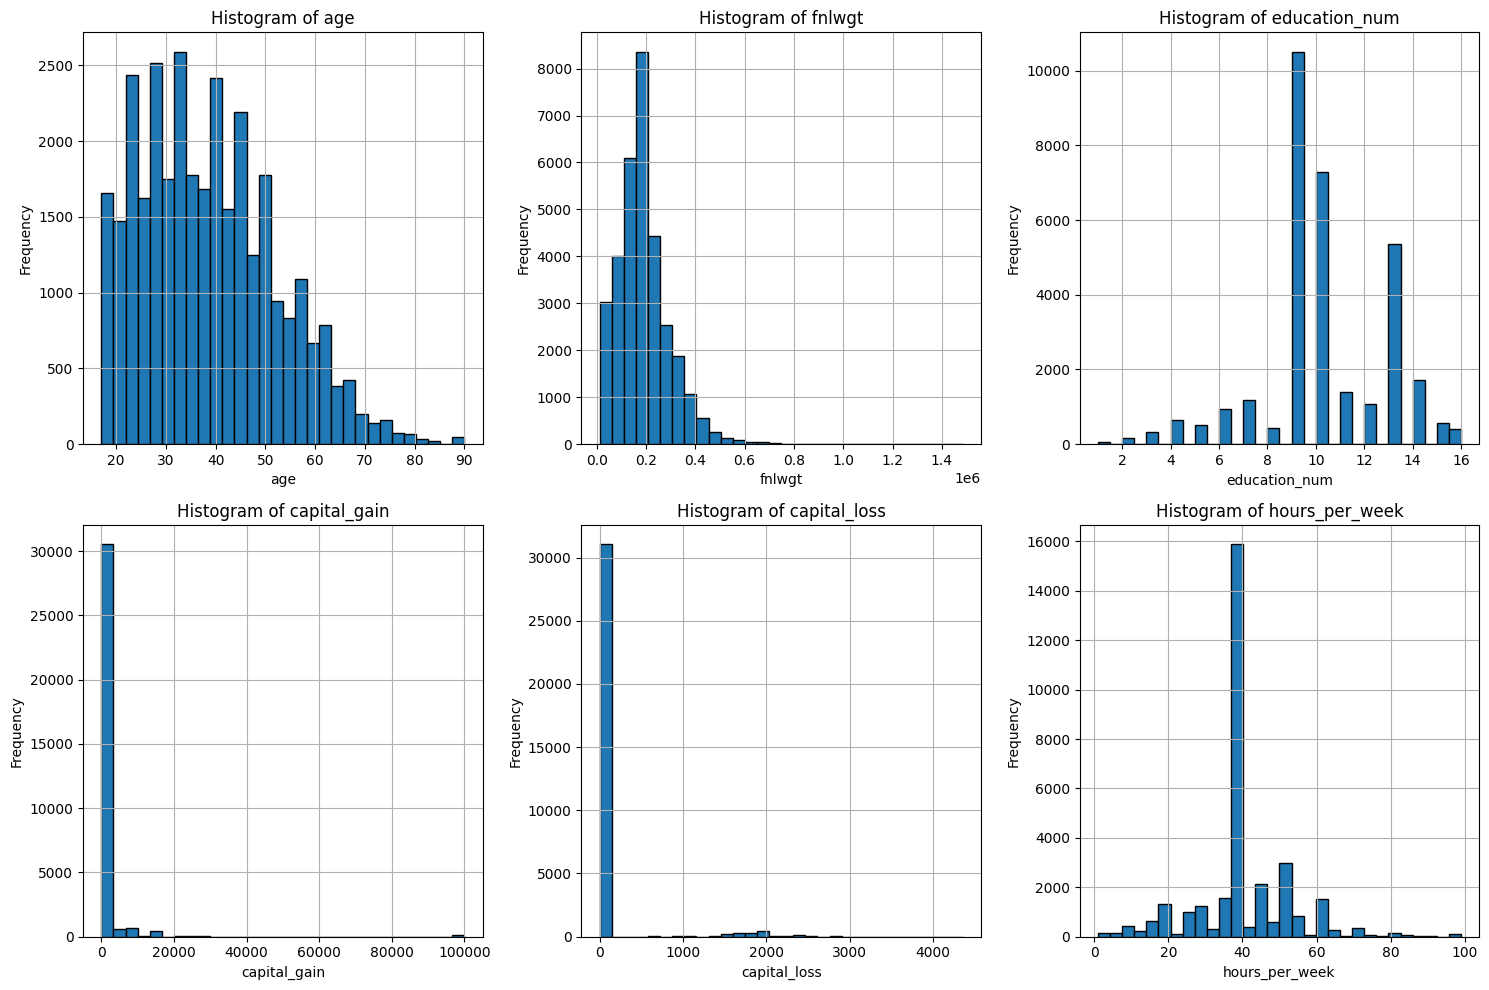

In [11]:

# Step 2: Identify Numerical Columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Plot Histograms
# Determine the number of rows and columns for subplots
num_columns = len(numerical_columns)
num_rows = (num_columns + 2) // 3  # Adjust the number of columns to suit your preference

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    df[col].hist(ax=ax, bins=30, edgecolor='k')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**** Since the data is not normal distribution, we'll apply min-max scaling for best scaling.

In [12]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [13]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [14]:
for col in categorical_features:
    unique_values = df[col].unique()
    print(f'Unique values in {col}: {unique_values}')


Unique values in workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values in marital_status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values in occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Unique values in relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Unique values in race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Ind

In [15]:
# Iterate through each column
for col in df.columns:
    # Print the column name
    print(f"Unique values in column '{col}':")
    # Print the unique values in the column
    print(df[col].unique())
    print()  # Print a blank line for readability

Unique values in column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values in column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in column 'fnlwgt':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values in column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in column 'education_num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values in column 'marital_status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique value

In [16]:
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df[numerical_features].describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  32561.000000   32561.000000  32561.000000  32561.000000   
mean       0.295639      0.120545       0.605379      0.010777      0.020042   
std        0.186855      0.071685       0.171515      0.073854      0.092507   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.150685      0.071679       0.533333      0.000000      0.000000   
50%        0.273973      0.112788       0.600000      0.000000      0.000000   
75%        0.424658      0.152651       0.733333      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

       hours_per_week  
count    32561.000000  
mean         0.402423  
std          0.125994  
min          0.000000  
25%          0.397959  
50%          0.397959  
75%          0.448980  
max          1.000000  


- **Min-Max Scaling:**
  - Preferred when the data does not necessarily follow a normal distribution.
  - Useful for algorithms like Neural Networks and K-Nearest Neighbors (KNN) that require the input features to be on the same     scale.
  - Ensures all features contribute equally to the result by scaling them to the same range.


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
min_max_scaler = MinMaxScaler()
data_min_max_scaled = df.copy()
data_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(data_min_max_scaled[numerical_features])


In [18]:
# One-Hot Encoding for categorical variables with < 5 categories
categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    if df[column].nunique() < 5:
        df1 = pd.get_dummies(df, columns=[column])

In [39]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_ <=50K,income_ >50K
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,True,False
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,True,False
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,True,False
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,True,False
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,True,False
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,False,True
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,True,False
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,True,False


In [19]:
# Label Encoding for categorical variables with >= 5 categories
label_encoder = LabelEncoder()
for column in categorical_features:
    if df[column].nunique() > 5:
        df2 = label_encoder.fit_transform(df[column])

In [20]:
df2

array([39, 39, 39, ..., 39, 39, 39])

In [21]:
# Feature Engineering - Creating new features (example)
df1['age_squared'] = df1['age'] ** 2
df1['hours_per_week_log'] = np.log1p(df1['hours_per_week'])

In [22]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_ <=50K,income_ >50K,age_squared,hours_per_week_log
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,1,0,0.090824,0.335013
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,1,0,0.204354,0.115513
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,1,0,0.082755,0.335013
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,1,0,0.243198,0.335013
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,1,0,0.022706,0.335013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,1,0,0.018765,0.320307
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,0,1,0.099268,0.335013
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,1,0,0.315444,0.335013
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,1,0,0.004691,0.177206


In [23]:
# Apply log transformation to a skewed feature (example)
df1['capital_gain_log'] = np.log1p(df1['capital_gain'])

In [24]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_ <=50K,income_ >50K,age_squared,hours_per_week_log,capital_gain_log
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,1,0,0.090824,0.335013,0.021507
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,1,0,0.204354,0.115513,0.000000
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,1,0,0.082755,0.335013,0.000000
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,1,0,0.243198,0.335013,0.000000
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,1,0,0.022706,0.335013,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,1,0,0.018765,0.320307,0.000000
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,0,1,0.099268,0.335013,0.000000
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,1,0,0.315444,0.335013,0.000000
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,1,0,0.004691,0.177206,0.000000


In [25]:
# Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(df1[numerical_features])
df1['outliers'] = outliers
df11 = df1[df1['outliers'] == 1]
df11.drop(columns=['outliers'], inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-25-bb78629558da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.drop(columns=['outliers'], inplace=True)


In [26]:
# Predictive Power Score
pps_matrix = pps.matrix(df11)
print(pps_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

                    x                   y   ppscore            case  \
0                 age                 age  1.000000  predict_itself   
1                 age           workclass  0.019085  classification   
2                 age              fnlwgt  0.000000      regression   
3                 age           education  0.069492  classification   
4                 age       education_num  0.000000      regression   
..                ...                 ...       ...             ...   
356  capital_gain_log       income_ <=50K  0.000000      regression   
357  capital_gain_log        income_ >50K  0.000000      regression   
358  capital_gain_log         age_squared  0.000000      regression   
359  capital_gain_log  hours_per_week_log  0.000000      regression   
360  capital_gain_log    capital_gain_log  1.000000  predict_itself   

     is_valid_score               metric  baseline_score  model_score  \
0              True                 None        0.000000     1.000000   
1

<ipython-input-31-80c7ba57b3e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df11.corr()


(11.5, -0.5)

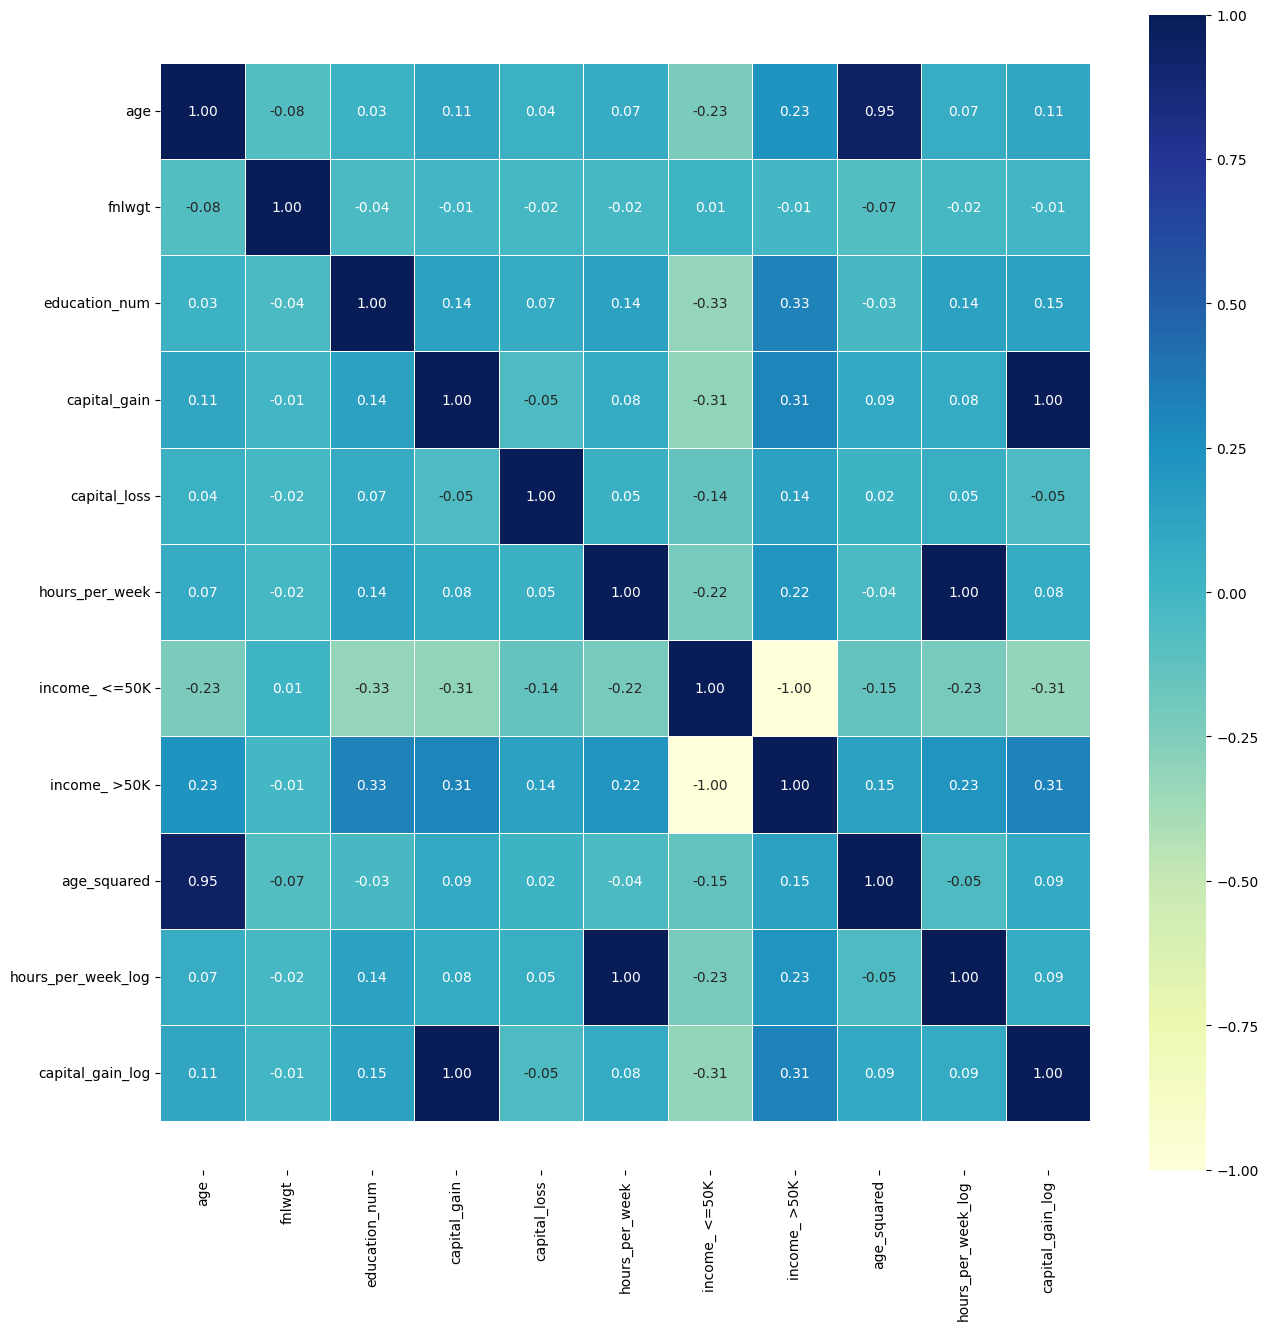

In [31]:
# Let's make our correlation matrix a little prettier
corr_matrix =df11.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)